<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
# Loading the data set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [19]:
# View data
pd.DataFrame(data.data, columns = data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33, random_state = 42)

In [20]:
# Scaling the data to standard to avoid huge distance difference due to variables unit.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Getting the dimension of the data
N, D = X_train.shape

In [23]:
# Making tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [24]:
# Alternative
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, shape = (D,), activation='sigmoid'))

In [25]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [26]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4073 - loss: 1.3881 - val_accuracy: 0.3883 - val_loss: 1.1695
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4332 - loss: 1.2261 - val_accuracy: 0.4362 - val_loss: 1.0899
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4632 - loss: 1.1859 - val_accuracy: 0.4734 - val_loss: 1.0154
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4628 - loss: 1.1671 - val_accuracy: 0.4787 - val_loss: 0.9462
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5252 - loss: 0.9757 - val_accuracy: 0.5106 - val_loss: 0.8841
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5510 - loss: 1.0411 - val_accuracy: 0.5372 - val_loss: 0.8270
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5671 - loss: 0.9242 - val_accuracy: 0.5691 - val_loss: 0.7749
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6179 - loss: 0.8720 - val_accuracy: 0.6

In [27]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9809 - loss: 0.1059 
Train score: [0.11376312375068665, 0.9763779640197754]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9676 - loss: 0.1197
Test score: [0.12177970260381699, 0.9680851101875305]


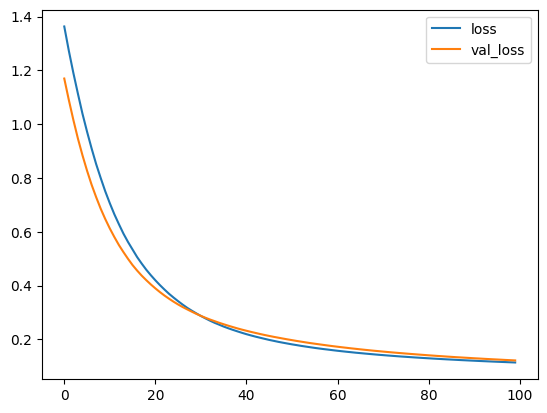

In [30]:
plt.plot(r.history["loss"], label = 'loss')
plt.plot(r.history["val_loss"], label = 'val_loss')
plt.legend();

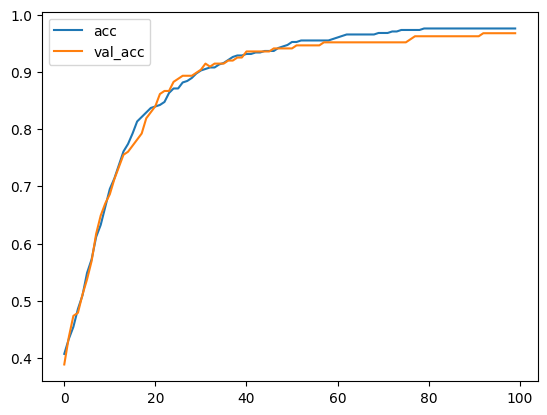

In [32]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()